In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('data.csv')
data.head()

,id,reviwerID,productID,reviewText,rating,summary,helpful,unixTime,reviewTime
0,0,67737,0528881469,We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,"[0, 0]",1370131200,"06 2, 2013"
1,1,176236,0594451647,The cable is very wobbly and sometimes disconn...,2.0,Cheap proprietary scam,"[0, 0]",1398556800,"04 27, 2014"
2,2,94526,0594481813,It does 2A and charges a DEAD Nook in a few ho...,3.0,This is the oem charger you get with the nook hd+,"[0, 0]",1377907200,"08 31, 2013"
3,3,71584,0594451647,This adaptor is real easy to setup and use rig...,5.0,A Perfdect Nook HD+ hook up,"[0, 0]",1399161600,"05 4, 2014"
4,4,105796,0594451647,This adapter easily connects my Nook HD 7&#34;...,4.0,A nice easy to use accessory.,"[0, 0]",1405036800,"07 11, 2014"


In [4]:
data.shape

(1689188, 9)

In [5]:
data = data.dropna()
data.shape

(1688102, 9)

In [6]:
data['len'] = data['reviewText'].str.count(' ')
data.head()

,id,reviwerID,productID,reviewText,rating,summary,helpful,unixTime,reviewTime,len
0,0,67737,0528881469,We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,"[0, 0]",1370131200,"06 2, 2013",155
1,1,176236,0594451647,The cable is very wobbly and sometimes disconn...,2.0,Cheap proprietary scam,"[0, 0]",1398556800,"04 27, 2014",21
2,2,94526,0594481813,It does 2A and charges a DEAD Nook in a few ho...,3.0,This is the oem charger you get with the nook hd+,"[0, 0]",1377907200,"08 31, 2013",129
3,3,71584,0594451647,This adaptor is real easy to setup and use rig...,5.0,A Perfdect Nook HD+ hook up,"[0, 0]",1399161600,"05 4, 2014",119
4,4,105796,0594451647,This adapter easily connects my Nook HD 7&#34;...,4.0,A nice easy to use accessory.,"[0, 0]",1405036800,"07 11, 2014",87


In [22]:
df = data.drop(data[data.len < 15].index)
df.head()

,id,reviwerID,productID,reviewText,rating,summary,helpful,unixTime,reviewTime,len
0,0,67737,0528881469,We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,"[0, 0]",1370131200,"06 2, 2013",155
1,1,176236,0594451647,The cable is very wobbly and sometimes disconn...,2.0,Cheap proprietary scam,"[0, 0]",1398556800,"04 27, 2014",21
2,2,94526,0594481813,It does 2A and charges a DEAD Nook in a few ho...,3.0,This is the oem charger you get with the nook hd+,"[0, 0]",1377907200,"08 31, 2013",129
3,3,71584,0594451647,This adaptor is real easy to setup and use rig...,5.0,A Perfdect Nook HD+ hook up,"[0, 0]",1399161600,"05 4, 2014",119
4,4,105796,0594451647,This adapter easily connects my Nook HD 7&#34;...,4.0,A nice easy to use accessory.,"[0, 0]",1405036800,"07 11, 2014",87


In [23]:
df2 = df.groupby(['reviewText']).size().to_frame('count')
# df2[df2['count'] >1].sort_values('count' ,ascending=False)
df = pd.merge(df, df2, on=['reviewText'])
df

,id,reviwerID,productID,reviewText,rating,summary,helpful,unixTime,reviewTime,len,count
0,0,67737,0528881469,We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,"[0, 0]",1370131200,"06 2, 2013",155,1
1,1,176236,0594451647,The cable is very wobbly and sometimes disconn...,2.0,Cheap proprietary scam,"[0, 0]",1398556800,"04 27, 2014",21,1
2,2,94526,0594481813,It does 2A and charges a DEAD Nook in a few ho...,3.0,This is the oem charger you get with the nook hd+,"[0, 0]",1377907200,"08 31, 2013",129,1
3,3,71584,0594451647,This adaptor is real easy to setup and use rig...,5.0,A Perfdect Nook HD+ hook up,"[0, 0]",1399161600,"05 4, 2014",119,1
4,4,105796,0594451647,This adapter easily connects my Nook HD 7&#34;...,4.0,A nice easy to use accessory.,"[0, 0]",1405036800,"07 11, 2014",87,1
5,6,96319,0594481813,I lost my B&N original cable. I looked around...,5.0,Great replacement for original power cable,"[2, 2]",1394323200,"03 9, 2014",73,1
6,7,83723,0594481813,"Go to Target or Barnes and Noble instead, and ...",3.0,$45 for a power cord? Good luck with that.,"[3, 5]",1379462400,"09 18, 2013",41,1
7,8,108904,0594481813,"Works well, a little pricey I think for a char...",4.0,Good replacement,"[2, 2]",1372291200,"06 27, 2013",25,1
8,9,47459,0594481813,bought for a spare for my 9&#34; Nook HD and i...,5.0,great fit,"[0, 0]",1399248000,"05 5, 2014",25,1
9,10,97870,0594481813,This item is just as was described in the orig...,4.0,As expected,"[2, 2]",1397606400,"04 16, 2014",19,1


In [43]:
df = df[df['count'] > 1]
df = df.groupby(['reviewText', 'reviwerID',  'productID']).sum()
df
# df = df.reset_index()
# df['reviwerID'].unique().shape

id  \
reviewText                                         reviwerID productID             
After my QuikPod broke in a week due to cheap p... 38260     B000VA4CK8   327427   
                                                   41686     B000VA4CK8   327379   
After reading many of the reviews here, these s... 83331     B00008Y0VN    59337   
                                                   116731    B00008Y0VN    59424   
All my SanDisk memeory cards have been excellen... 110132    B000J47W12   243134   
                                                   132907    B000J47W12   243084   
Although I was skeptical, this holds onto the d... 178304    B000LRMS66   257427   
                                                   183750    B000LRMS66   258422   
Bought for a new camera and works fine. Many ol... 45542     B000P1O73A   287975   
                                                   161646    B000P1O73A   287992   
Bought these cables for the length and good pri... 1320      B005H3Q57M  1137497   
                                                   145065    B005H3Q57M  1137492   
Bought this along with an iXCC 10 foot Lightnin... 108935    B0097BEFWC  1453446   
                                                   175721    B0097BEFWC  1453460   
Cables are well made from what appear to be gre... 88266     B00008OE6F    57456   
                                                   165033    B000E8OVMG   190695   
Charges well. Works great with two Tenergy Cent... 108935    B00456EC1I   898536   
                                                   127132    B00456EC1I   898518   
Convenient in hand, immediately shuts down when... 132907    B0002CPBWI   105190   
                                                   133129    B0002CPBWI   105535   
Easy to install, very good instructions (especi... 35192     B00BT7RAPG  1574060   
                                                   81593     B00BT7RAPG  1574056   
Excellent Product and wonderful service from th... 134728    B001FVI91U   464426   
                                                   157519    B001FVI91U   464382   
For many years, the largest bottleneck in compu... 2224      B004W2JKWG  1038150   
                                                   164147    B005V198J2  1190644   
Good battery for the money but only lasts about... 24274     B0098TG67U  1457602   
                                                   106296    B0098TG67U  1457641   
Good product that works with the PC to TV Conve... 121909    B0016LFN2C   400797   
                                                   141491    B0016LFN2C   400794   
...                                                                          ...   
This helps my iPhone and iPad work seamlessly w... 91395     B004JHY2ZY   967887   
                                                   173393    B004JHY2ZY   967884   
This inexpensive radar unit for autos works to ... 88418     B007M8SGW2  1311121   
                                                   97074     B00007KDVI    53050   
This power supply is very well made. I also hav... 106581    B000X24ISU   345122   
                                                   151444    B000X24ISU   344799   
To put this very simple. I have a Canon 430EX I... 30416     B003G81G6K   775901   
                                                   60448     B003G81G6K   775908   
Very useful as a camera monitor. Impressive fea... 34992     B001W8WEGC   550098   
                                                   163385    B001W8WEGC   550091   
We have two young children who are often fighti... 121420    B008TTCJOY  1424622   
                                                   143266    B008TTCJOY  1424616   
Well built good quality bananas, holds wire str... 82846     B006U3O566  1246815   
                                                   166946    B006U3O566  1246626   
What a bargain, two batteries and a charger for... 81985     B0084G3FKE  1363953   
                                              

In [34]:
# from difflib import SequenceMatcher
# # Duplicate from difference userid on the same product
# # for i in range(df.shape[0]-1):
# #     for j in range(i+1, df.shape[0]):

# col_names = ['reviewverID', 'productID', 'reviewTextA', 'reviewTextB', 'ratio', 'helpful', 'reviewTime',]
# out = pd.DataFrame(columns = col_names)

# for i in range(10):
#     for j in range(i+1, 11):
#         a = str(df.reviewText[i])
#         b = str(df.reviewText[j])
#         ratio = SequenceMatcher(None, a, b).ratio()
#         if ratio > 70:
#             out.append({
#                 'reviewverID': arr.iloc[arr_index].ACTYPE,
#                 'productID': arr.iloc[arr_index].OWNER,
#                 'reviewTextA': arr.iloc[arr_index].REALON,
#                 'reviewTextB': dep.iloc[dep_index].REALOFF,
#                 'ratio': arr.iloc[arr_index].BAY,
#                 'helpful': arr.iloc[arr_index].GATE,
#                 'reviewTime': 
#                 },ignore_index=True)
    


In [ ]:
df['reviwerID'].unique().shape

In [32]:
data['unhelped'] = data.retio - data.helped
data['sumHelped'] = data.helped - data.unhelped
print("Helpful:", data[data.sumHelped > 0].shape[0])
print("Unhelpful:", data[data.sumHelped < 0].shape[0])
print("Normal:", data[data.sumHelped == 0].shape[0])
print("Ratio of unhelpful comment", data[data.sumHelped < 0].shape[0]/data.shape[0])

Helpful: 538421
Unhelpful: 130465
Normal: 1020302
Ratio of unhelpful comment 0.0772353343736754


In [16]:
for index, i in data.iterrows():
    print(len(data.iloc[index].reviewText))

805
128
614
580
420
62
362
219
141
123
113
414
109
231
104
280
735
154
229
439
177
823
368
120
776
234
257
224
136
442
2199
337
1189
161
212
503
171
182
297
108
116
373
352
481
269
1048
122
365
135
975
209
364
435
255
455
105
338
283
806
638
280
125
850
323
863
135
212
1076
169
101
724
192
135
190
272
166
279
106
247
133
522
978
142
344
109
254
481
112
336
166
173
108
142
462
2246
157
1204
597
102
115
799
169
567
179
664
124
134
214
377
872
619
109
132
970
230
213
974
133
215
2175
269
135
201
315
210
299
391
160
462
1443
441
260
100
233
207
127
962
734
376
166
215
223
379
163
476
513
180
358


TypeError: object of type 'float' has no len()

In [33]:
test = data.groupby(['reviewText']).size().to_frame('count')
test[test['count'] >1].sort_values('count' ,ascending=False)
# test

,count
reviewText,
works great,37
Works great!,30
Works great,28
Works great.,24
Great,22
good,21
Perfect,19
Good,19
Works as advertised.,17


(array([ 108725.,   82139.,  142257.,  347041., 1009026.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <a list of 5 Patch objects>)

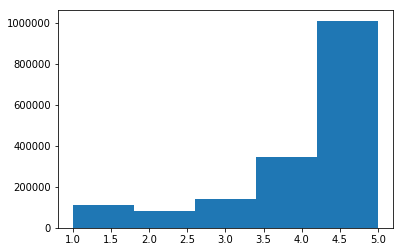

In [3]:
plt.hist(data['rating'], bins = 5)

In [4]:
mean = data['rating'].mean()
std = data['rating'].std()
print("mean",mean)
print("stdev",std)

mean 4.222779228836577
stdev 1.1856317977886985


In [5]:
data['score'] = np.where(data['rating']<mean-std, 0, 1)
data.head()

,Unnamed: 0,reviewText,rating,summary,helpful,helped,unhelped,sumHelped,score
0,0,We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,"[0, 0]",0,0,0,1
1,1,The cable is very wobbly and sometimes disconn...,2.0,Cheap proprietary scam,"[0, 0]",0,0,0,0
2,2,It does 2A and charges a DEAD Nook in a few ho...,3.0,This is the oem charger you get with the nook hd+,"[0, 0]",0,0,0,0
3,3,This adaptor is real easy to setup and use rig...,5.0,A Perfdect Nook HD+ hook up,"[0, 0]",0,0,0,1
4,4,This adapter easily connects my Nook HD 7&#34;...,4.0,A nice easy to use accessory.,"[0, 0]",0,0,0,1


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
splt = data['reviewText'][0].split('. ')
# splt = splt[0:3]
splt
# w1 = splt[0].split(' ')
# w2 = splt[1].split(' ')
# w3 = splt[2].split(' ')
# w4 = splt[3].split(' ')
# w5 = splt[4].split(' ')
# w6 = splt[5].split(' ')
# w7 = splt[6].split(' ')
# w8 = splt[7].split(' ')
# ans = w1+w2+w3+w4+w5+w6+w7+w8
# len(ans)
# iii = list(set(ans))
# # len(iii)
# iii

['We got this GPS for my husband who is an (OTR) over the road trucker',
 ' Very Impressed with the shipping time, it arrived a few days earlier than expected..',
 ' within a week of use however it started freezing up..',
 'could of just been a glitch in that unit',
 ' Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option',
 '(the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory',
 " Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that's just my luck",
 ' I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!']

In [24]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(splt)

In [52]:
print(X)

  (0, 83)	0.2860240244756767
  (0, 30)	0.2860240244756767
  (0, 73)	0.2860240244756767
  (0, 31)	0.2860240244756767
  (0, 27)	0.20685045484362063
  (0, 48)	0.20685045484362063
  (0, 35)	0.2860240244756767
  (0, 88)	0.2860240244756767
  (0, 40)	0.20685045484362063
  (0, 3)	0.23971045519268863
  (0, 54)	0.2860240244756767
  (0, 55)	0.2860240244756767
  (0, 72)	0.14292928370430968
  (0, 61)	0.2860240244756767
  (0, 77)	0.23971045519268863
  (1, 72)	0.15363338431177123
  (1, 81)	0.257662583423816
  (1, 36)	0.257662583423816
  (1, 90)	0.22234166855407272
  (1, 67)	0.30744461691684893
  (1, 74)	0.30744461691684893
  (1, 41)	0.1949446385183466
  (1, 6)	0.30744461691684893
  (1, 26)	0.30744461691684893
  (1, 17)	0.30744461691684893
  :	:
  (6, 52)	0.22646006602348054
  (6, 46)	0.22646006602348054
  (6, 4)	0.18979120935371352
  (6, 44)	0.22646006602348054
  (7, 27)	0.160138080068495
  (7, 48)	0.160138080068495
  (7, 3)	0.1855774119323191
  (7, 72)	0.2213040439797638
  (7, 81)	0.1855774119323191

In [26]:
a = X.toarray()
a

array([[0.        , 0.        , 0.        , 0.23971046, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.20685045, 0.        , 0.        ,
        0.28602402, 0.28602402, 0.        , 0.        , 0.        ,
        0.28602402, 0.        , 0.        , 0.        , 0.        ,
        0.20685045, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.20685045, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.28602402,
        0.28602402, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.28602402, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.14292928, 0.28

In [10]:
word = vectorizer.get_feature_names()
print(vectorizer.get_feature_names())

['about', 'addresses', 'all', 'an', 'and', 'around', 'arrived', 'as', 'back', 'bad', 'been', 'big', 'bigger', 'but', 'coming', 'contacted', 'could', 'days', 'does', 'earlier', 'ease', 'ect', 'email', 'exception', 'exchange', 'expected', 'few', 'for', 'freezing', 'glitch', 'got', 'gps', 'great', 'have', 'however', 'husband', 'impressed', 'in', 'instructions', 'into', 'is', 'it', 'just', 'love', 'luck', 'memory', 'million', 'minutes', 'my', 'normal', 'nothing', 'of', 'one', 'option', 'otr', 'over', 'person', 'probably', 'putting', 'really', 'received', 'road', 'routes', 'say', 'scale', 'screen', 'seller', 'shipping', 'started', 'tells', 'than', 'that', 'the', 'this', 'time', 'to', 'truck', 'trucker', 'unit', 'up', 'use', 'very', 'way', 'we', 'week', 'well', 'when', 'which', 'who', 'will', 'with', 'within', 'work', 'worked', 'you']
